# Izhikevich SNN model in Brian2 software

The Izhikevich spiking neuron model is a simple representation of the behaviour of cortical neurons, which is a computationally efficient model which also simulates Hodkin-Huxley-type dynamics correctly

In order to understand the importance of this model, the usual models for this must be presented first. There are two main groups of models, the "Integrate-and-Fire" type, which simplicity makes it an efficient option, yet not really accurate; and the Hodkin-Huxley-type, which can accurately simulate biologically plausible patterns, despite being prohibitively costly to simulate, due to its complexity.

The key of this model its while being "simple" can represent a wide range of patterns of real neurons.


In [1]:
from brian2 import *
from scipy import stats
%matplotlib inline

The mathematical representation of the equations is given by a Hodkin-Huxley-type model represented by a 2D system of ordinary differential equations:

$$\begin{eqnarray}
v' &=& 0.04v^2+ 5v + 140 - u + I \\
u' &=& a(bv - u) \\
\end{eqnarray}$$

And its reset is represented like this:

$$\begin{eqnarray}
\mbox{if } v \geq 30 mV \mbox{ then} \begin{cases} v \leftarrow c  \\ u \leftarrow u + d  \end{cases} 
\end{eqnarray}$$

Where $v$ and $u$ are dimensionless variables, and $a,b,c \mbox{ and } d$ are dimensionless parameters 

$v$ represents the membrane potential of the neuron, $u$ represents neuron's recovery variable, and it is the counterpart of $v$, as it gives negative feedback to it. $I$ corresponds to the synaptic or injected current.

Parameter $a$ describes the time scale for recovering $v$. Smaller values of  $a$ result in slower recovery 

Parameter $b$ relates to $u$, as greater values of $b$ couple $v$ and $u$ strongly and give the model other dynamics, such as subthreshold oscillations and low-threshold spiking dynamics

Parameter $c$ is more straightforward, as it describes the after-spike reset value of $v$ 

Parameter $d$ is $c$'s equivalent for $u$, as it describes the after-spike reset value of variable $u$




In [2]:
def model(a_p = 0.02, b_p = 0.2, c_p = -65, d_p = 8, I = 15, neurons = 1, duration = 100*ms):
    start_scope()

    b = b_p/ms
    c = c_p * mV
    I = I*mV/ms


    #Neuronal equations of the Izhikevich-neuron
    eqs = '''
    dv/dt = (0.04/ms/mV)*v**2+(5/ms)*v+140*mV/ms-u+I : volt
    du/dt = a*(b*v-u)                                : volt/second
    a                                                : 1/second
    d                                                : volt/second
    '''


    reset = '''
    v = c
    u = u + d
    '''


    #Set up neuron population
    G = NeuronGroup(neurons,eqs,threshold='v >= 30*mV',reset=reset,method='euler')
    G.a = a_p/ms
    G.d = d_p*mV/ms
    G.v = c
    G.u = b * c


    M = StateMonitor(G,'v', record=True)

    run(duration)
    
    
    return M

# Excitatory cortical cells

# Regular Spiking (RS)

These are the most typical neurons, which given a prolonged stimuli, will fire periodically, and increasing the injected current will also increase the firing frequency. However, there is a limit on how fast can this frequency become,as the phenomenon  of large spike-afterhyperpolarization would limit it.

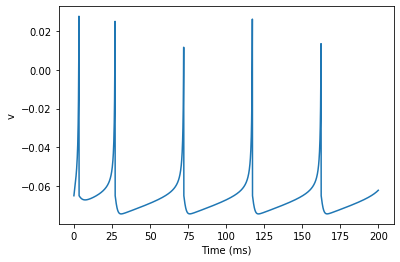

In [3]:
# RS

M = model(I = 10, duration = 200*ms)

figure
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

show()

# Intrinsically Bursting (IB)

For this neuron model, the characteristical pattern is given by an initial burst of spikes, followed by several single spikes. This behaviour is explained by the configuration of the $c$ and $d$ parameters, in order to give a high voltage reset to the model and  and a large after-spike for $u$

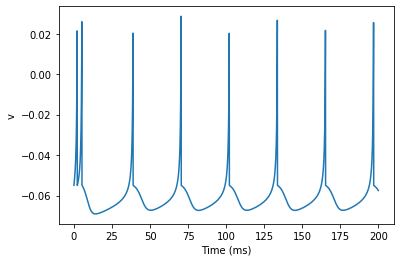

In [4]:
# IB

M = model(c_p = -55, d_p = 4, I = 10, duration = 200*ms)

figure
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

show()

# Chattering neurons (CH)

The characteristical pattern for this neuron model can be described as bursts of several close spikes with a certain frequency. The way to describe that behaviour is by setting $c$ and $d$ parameters to a high voltage reset and a moderate after-spike jump of $u$. 

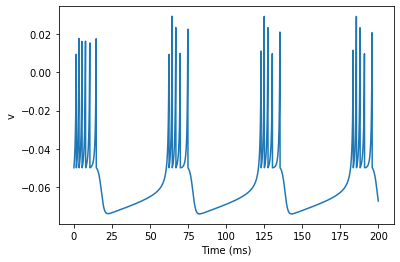

In [5]:
# CH

M = model(c_p = -50, d_p = 2, I = 10, duration = 200*ms)

figure
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

show()

# Thalamo-Cortical neurons

# Thalamo-Cortical (TC)

For this type of neuron can be separated in two different behaviours, depending on the given membrane potential, when the potential is at "rest" level, the behaviour is classified as type 1, and when hyperpolarized, the behaviour is type 2. 

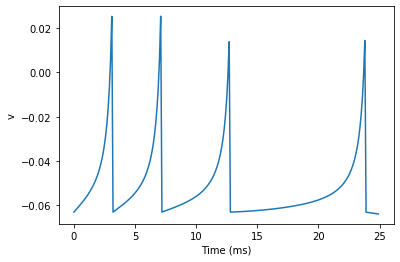

In [6]:
# TC type 1

M = model(c_p = -63, d_p = 2, I = 10, duration = 25*ms)

figure
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

show()

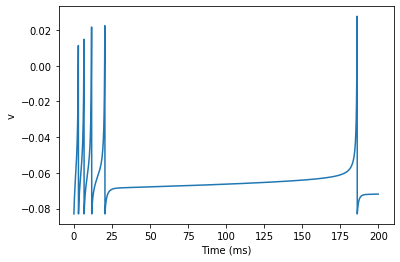

In [7]:
# TC type 2

M = model(a_p = 0.001,b_p = 0.25,c_p = -83, d_p = 4, I = 10, duration = 200*ms)

figure
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

show()

# Inhibitory Cortical Cells

# Fast Spiking (FS)

For this neural model, the recovery parameter $a$ is adjusted, in order to  set a high recovery rate for the model. By giving this condition to the model, it can fire spikes repeatedly without adaptation to the stimuli (decrease in the firing rate).

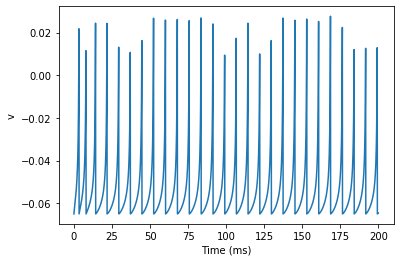

In [8]:
# FS

M = model(a_p = 0.1, b_p = 0.2, c_p = -65, d_p = 2, I = 10, duration = 200*ms)

figure
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

show()

# Low-Threshold_Spiking (LTS)

Here is shown another model which can fire repeatedly with high frequency spikes, however, this model y sensitive to intensity adaptation, as firing rate decreases after being exposed continously to the stimuli. This type of behaviour can be achieved by setting the firing threshold to a low value, given by $b$, although in order to represent accurately the desired  pattern it might need further tuning in the parameters.

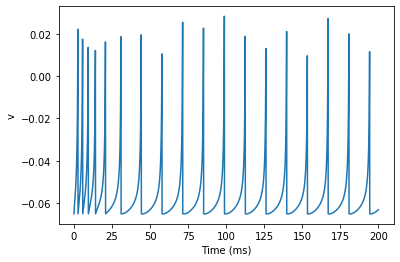

In [9]:
# LTS

M = model(a_p = 0.02, b_p = 0.25, c_p = -65, d_p = 2, I = 10, duration = 200*ms)

figure
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

show()

# Other types of neurons

# Resonator (RZ)

For this model the parameters are set to $a$ = 0.01 and $b$ = 0.26, while maintaining $c$ and $d$ in standard values. Given this concrete configuration, the model becomes sensitive to stimuli, and with little variations on that stimuli the neuron can be switched from one state to another.

the following cells show how by changing the input intensity the model can be switched from spiking state to resting state.

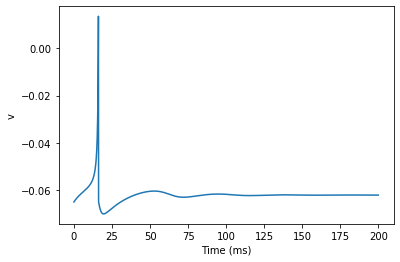

In [10]:
#RZ Resting state

M = model(a_p = 0.1, b_p = 0.26, c_p = -65, d_p = 2, I = 0.1, duration = 200*ms)

figure
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

show()

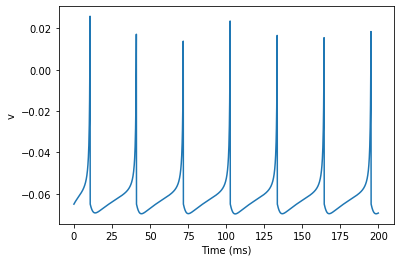

In [11]:
# RZ Spiking state

M = model(a_p = 0.1, b_p = 0.26, c_p = -65, d_p = 2, I = 0.5, duration = 200*ms)

figure
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

show()